In [1]:
import topogenesis as tg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
avail_array = np.zeros((50,50,1), dtype=int)
main_courtyard = (8,16,1)
sp = (22,0,0)

In [3]:
avail_array[sp[0]:sp[0] + main_courtyard[0], sp[1]:sp[1] + main_courtyard[1], sp[2]:sp[2] + main_courtyard[2]] = 1

In [4]:
avail_lattice = tg.to_lattice(avail_array, minbound=[0,0,0])

In [5]:
up_s = tg.create_stencil("von_neumann", 1, 1)
up_s[1, 1, 1] = 0
up_s[1, 1, :] = 0
up_s.function = tg.sfunc.sum 
up_s

stencil([[[0, 0, 0],
          [0, 1, 0],
          [0, 0, 0]],

         [[0, 1, 0],
          [0, 0, 0],
          [0, 1, 0]],

         [[0, 0, 0],
          [0, 1, 0],
          [0, 0, 0]]])

In [6]:
stencil = tg.create_stencil("von_neumann", 1, 1)
stencil[:, 1, 1] = 0
stencil[1, 1, :] = 0
stencil.function = tg.sfunc.sum 
stencil

stencil([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         [[0, 1, 0],
          [0, 0, 0],
          [0, 1, 0]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]])

In [7]:
neigh_lattice = avail_lattice.apply_stencil(up_s)

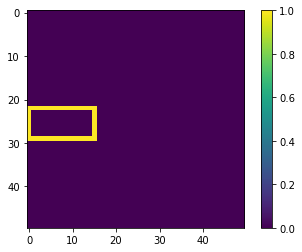

In [12]:
plt.imshow((neigh_lattice[:,:,0]>1) * (neigh_lattice[:,:,0]<4))
plt.colorbar()
plt.show()

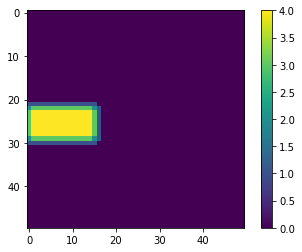

In [490]:
plt.imshow(neigh_lattice[:,:,0])
plt.colorbar()
plt.show()

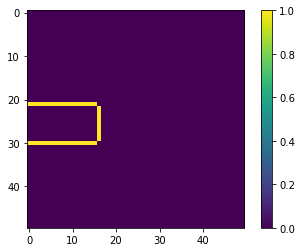

In [491]:
plt.imshow((neigh_lattice[:,:,0]==1) * (avail_lattice[:,:,0]==0))
plt.colorbar()
plt.show()

In [492]:
# def around_main_courtyard

In [493]:
# input playground
playground = (8,8,1)

# find position of playground
first = neigh_lattice[:,:,0]
index = np.where(first==1)
position = index[0][0] - playground[0] + 1, index[1][0], 0
position

(14, 0, 0)

In [494]:
# place playground in the lattice
avail_array[position[0]:position[0] + playground[0], position[1]:position[1] + playground[1], position[2]:position[2] + playground[2]] = 2

In [495]:
# create lattice
avail_lattice= tg.to_lattice(avail_array, minbound=[0,0,0])

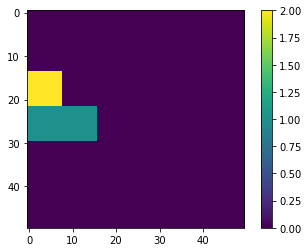

In [496]:
# print
plt.imshow(avail_lattice[:,:,0])
plt.colorbar()
plt.show()

In [497]:
neigh_lattice = avail_lattice.apply_stencil(up_s)
    
first = neigh_lattice[:,:,0]
index = np.where(first ==1)
select_x = np.random.choice(index[0][0], 1, replace=False)
select_y = np.random.choice(index[0][0], 1, replace=False)
step=[(),()]
step[1] = (int(select_x) + 1, int(select_y), 0)
step

[(), (16, 9, 0)]

In [33]:
import random
a = False
while a == False:
    neigh_lattice = avail_lattice.apply_stencil(up_s)
    
    layer = neigh_lattice[:,:,0]
    index = np.argwhere(layer ==1)
    # index_list = index.tolist()
    # index_tuple = []
    # for i in index_list:
    #     index_tuple.append(tuple(i))

    index_tuple = [tuple(i) for i in index.tolist()]

    # print(index_tuple)
    si = index_tuple[np.random.choice(len(index_tuple), 1, replace=False)[0]]
    # select_x = np.random.choice(index[0], 1, replace=False)
    # select_y = np.random.choice(index[1], 1, replace=False)
    
    ar = np.sum(neigh_lattice[si[0]+1:si[0]+8, si[1]]==0) == 7
    ac = np.sum(neigh_lattice[si[0], si[1]+1:si[1]+8]==0) == 7
    
    a = ar or ac
#     steps = [(),(),(),(),(),(),(),()]

#     if int(select_x) + 1 == 1:
#         for i in range(0,7):
#             steps[i] = (int(select_x) + i, int(select_y), 0)
#     else:
#         for i in range(0,7): 
#             steps[i] = (int(select_x), int(select_y) + i, 0)
#     for i in range(0,3):
#         if steps[i] == 0:
#             a = False
#             break
#         else:
#             a = True
# space = (8,8,1)


# if int(select_x) + 1 == 1:
#     # find position of area
#     position = int(select_x) - space[0] + 1 , int(select_y) - 1, 0
#     # place area in the lattice
#     avail_array[position[0]:position[0] + space[0], position[1]:position[1] + space[1], position[2]:position[2] + space[2]] = 3
#     # create lattice
#     avail_lattice= tg.to_lattice(avail_array, minbound=[0,0,0])
# else:
#     # find position of area
#     position = int(select_x) + 1 , int(select_y) + space[1] - 1, 0
#     # place area in the lattice
#     avail_array[position[0]:position[0] + space[0], position[1]:position[1] + space[1], position[2]:position[2] + space[2]] = 4
#     # create lattice
#     avail_lattice= tg.to_lattice(avail_array, minbound=[0,0,0])
    
# # print
# plt.imshow(avail_lattice[:,:,0])
# plt.colorbar()
# plt.show()
# print(select_x)
# print(int(select_x), int(select_y), 0)

In [499]:
# input sitting area
sitting_area = (8,8,1)

# find position of sitting area
position_1 = index_1[0][0] - sitting_area[0] + 1, index_1[1][0] - 1, 0
position_1

(14, 8, 0)

In [500]:
# place sitting area in the lattice
avail_array[position_1[0]:position_1[0] + sitting_area[0], position_1[1]:position_1[1] + sitting_area[1], position_1[2]:position_1[2] + sitting_area[2]] = 3

In [501]:
# create lattice
avail_lattice= tg.to_lattice(avail_array, minbound=[0,0,0])

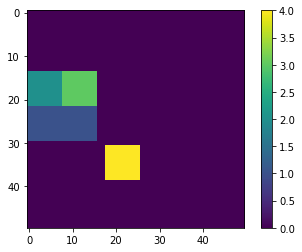

In [502]:
# print
plt.imshow(avail_lattice[:,:,0])
plt.colorbar()
plt.show()

In [503]:
neigh_lattice = avail_lattice.apply_stencil(up_s)

In [504]:
# input joker
joker = (8,8,1)

# find position of joker
first_2 = neigh_lattice[:,:,0]
index_2 = np.where(first_1 ==1)
position_2 = index_2[0][0] + 1, index_2[1][0] + joker[1] -1, 0
position_2

(22, 16, 0)

In [505]:
# place joker in the lattice
avail_array[position_2[0]:position_2[0] + joker[0], position_2[1]:position_2[1] + joker[1], position_2[2]:position_2[2] + joker[2]] = 4

In [506]:
# create lattice
avail_lattice= tg.to_lattice(avail_array, minbound=[0,0,0])

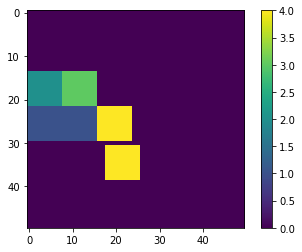

In [507]:
# print
plt.imshow(avail_lattice[:,:,0])
plt.colorbar()
plt.show()